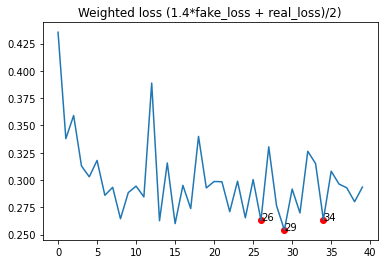

<Figure size 1152x1152 with 0 Axes>

In [5]:
import argparse

import numpy as np

from matplotlib import pyplot as plt


#def parse_args():
#    parser = argparse.ArgumentParser(
#        description="Plot losses from log")
#    parser.add_argument("--log-file", help="path to log file", required=True)
#    parser.add_argument("--fake-weight", help="weight for fake loss", default=1.4, type=float)
#    args = parser.parse_args()
#    return args


def main():
#    args = parse_args()

    with open("logs/b7_999", "r") as f:
        lines = f.readlines()
    real_losses = []
    fake_losses = []
    for line in lines:
        line = line.strip()
        if line.startswith("fake_loss"):
            fake_losses.append(float(line.split(" ")[-1]))
        elif line.startswith("real_loss"):
            real_losses.append(float(line.split(" ")[-1]))
    real_losses = np.array(real_losses)
    fake_losses = np.array(fake_losses)
    loss = (fake_losses * 1.4 + real_losses)/2
    plt.title("Weighted loss ({}*fake_loss + real_loss)/2)".format(1.4))
    best_loss_idx = np.argsort(loss)[:5]
    # ignore early epochs  loss is quite noisy and there could be spikes
    best_loss_idx = best_loss_idx[best_loss_idx > 16]
    plt.scatter(best_loss_idx, loss[best_loss_idx], c="red")
    for idx in best_loss_idx:
        plt.annotate(str(idx), (idx, loss[idx]))
        
    plt.plot(loss)
    plt.figure(figsize=(16,16))
    plt.show()
    


if __name__ == '__main__':
    main()